## Load required modules.

In [1]:
%matplotlib widget
# Import ncessary modules.
from sklearn.decomposition import PCA
import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import ipywidgets 
from ipywidgets import interact 
import ipywidgets as widgets
from matplotlib import pyplot
from IPython.display import display, clear_output
import time
from time import sleep

## Read EXCEL data file into data frame.

In [6]:
# File path to your Excel file.
file_path = 'Geochemistry Results-AGG reduced variables.xlsx'

# Define the sheet name to read.
sheet_name = 'Litogeochemistry - clean'

df = pd.read_excel(file_path, sheet_name=sheet_name)

lithologies = [
    "Calcitic marble", "Dolomitic marble", "Di-Tr dolomitic marble",
    "Carbonatite", "Carbonatite-like", "Syenite", "Altered syenite",
    "Syenite-like", "Impure siliciclastic", "Pure siliciclastic"
]

lithology_dropdown = widgets.SelectMultiple(
    options=['all'] + lithologies,
    value = []
)

output = widgets.Output()

def filter_dataframe(change):
    global filtered_df
    selected = change['new']
    with output:
        clear_output(wait=True)
        if 'all' in selected:
            filtered_df = pd.read_excel(file_path, sheet_name=sheet_name)
            display(filtered_df)
        else:
            filtered_df = df[df.iloc[:, 3].isin(selected)]
            display(filtered_df)

lithology_dropdown.observe(filter_dataframe, 'value')

display(lithology_dropdown)
display(output)



SelectMultiple(options=('all', 'Calcitic marble', 'Dolomitic marble', 'Di-Tr dolomitic marble', 'Carbonatite',…

Output()

In [3]:
proceed_button = widgets.Button(description="Proceed")

def on_proceed_button_clicked(b):
    proceed_button.description = "Proceeding..."
    proceed_button.disabled = True

proceed_button.on_click(on_proceed_button_clicked)

display(proceed_button)

Button(description='Proceed', style=ButtonStyle())

In [7]:
#input("Press Enter to continue...")
filtered_df.head()

,Sample Description,Year,Depth(meters),Lithology,Shape,Comment,PTS,Al2O3_pct,BaO_pct,CaO_pct,...,Cd_ppm,Co_ppm,Cu_ppm,Li_ppm,Mo_ppm,Ni_ppm,Pb_ppm,Zn_ppm,C_pct,S_pct
0,S10-01,2022,4.44,Di-Tr dolomitic marble,Marble Units,NaN,No,0.73,0.02,26.7,...,0.25,4.0,10,20,1.0,6.0,4,27,7.22,0.23
1,S10-02,2022,14.49,Dolomitic marble,Marble Units,NaN,No,0.68,0.08,30.3,...,0.25,2.0,9,20,1.0,5.0,6,22,9.99,0.75
2,S10-03,2022,15.74,Dolomitic marble,Marble Units,NaN,No,0.56,0.01,29.4,...,0.25,1.0,5,10,1.0,4.0,3,23,10.55,0.58
3,S10-04,2022,26.80,Calcitic marble,Marble Units,NaN,Yes,0.92,0.04,37.0,...,0.25,0.5,4,20,1.0,3.0,10,31,7.76,0.26
4,S10-05,2022,27.02,Calcitic marble,Marble Units,NaN,Yes,3.18,0.08,35.4,...,0.25,3.0,9,10,1.0,7.0,4,13,7.79,1.22


In [8]:
filtered_df.shape

(103, 66)

## Remove symbols "<" and "NaN".

In [9]:
df = filtered_df.iloc[: , 7:]
df=df.replace('\<','',regex=True).astype(float)
df = df[np.isfinite(df).all(1)]
df = df.dropna()
df.head()

,Al2O3_pct,BaO_pct,CaO_pct,Fe2O3_pct,K2O_pct,MgO_pct,MnO_pct,Na2O_pct,P2O5_pct,SiO2_pct,...,Cd_ppm,Co_ppm,Cu_ppm,Li_ppm,Mo_ppm,Ni_ppm,Pb_ppm,Zn_ppm,C_pct,S_pct
0,0.73,0.02,26.7,0.72,0.20,18.70,0.06,0.48,0.13,25.27,...,0.25,4.0,10.0,20.0,1.0,6.0,4.0,27.0,7.22,0.23
1,0.68,0.08,30.3,1.44,0.28,18.15,0.11,0.40,0.20,9.90,...,0.25,2.0,9.0,20.0,1.0,5.0,6.0,22.0,9.99,0.75
2,0.56,0.01,29.4,1.23,0.05,19.40,0.10,0.29,0.16,10.46,...,0.25,1.0,5.0,10.0,1.0,4.0,3.0,23.0,10.55,0.58
3,0.92,0.04,37.0,0.59,0.17,10.20,0.05,0.62,0.07,19.68,...,0.25,0.5,4.0,20.0,1.0,3.0,10.0,31.0,7.76,0.26
4,3.18,0.08,35.4,1.78,0.09,5.33,0.05,1.82,0.08,23.63,...,0.25,3.0,9.0,10.0,1.0,7.0,4.0,13.0,7.79,1.22


In [10]:
df.shape

(103, 59)

## Scale data and apply PCA.

In [11]:
# Scale data before applying PCA
scaling=StandardScaler()

try:
    # Use fit and transform method 
    scaling.fit(df)
    Scaled_data=scaling.transform(df)
     
    # Set the n_components=3
    pca=PCA(n_components=3)
    pca.fit(Scaled_data)
    x=pca.transform(Scaled_data)
     
    # Check the dimensions of data after PCA
    print(x.shape)
except:
    print ('Not enough components for PCA. Please select more!')
    

(103, 3)


## Create a datafram for PCA componenets and scale it.

In [12]:
# Create dataframe
pca_df = pd.DataFrame(
    data=x, 
    #columns=['PC1', 'PC2', 'PC3'])
    columns=['PC'+str(i) for i in range(1, len(pca.components_)+1)])
pca_df

,PC1,PC2,PC3
0,-2.904121,-0.687502,-1.153024
1,-2.373494,0.971286,-1.018139
2,-3.351016,0.273103,-0.897033
3,-1.068464,0.890351,-1.551955
4,1.256470,0.581373,-0.742524
...,...,...,...
98,8.492903,-3.062950,2.291491
99,8.186120,-3.821682,2.597764
100,-3.457230,-0.788820,-1.570951
101,-4.381459,0.132171,-1.652483


In [13]:
# Create the scaled PCA dataframe
pca_df_scaled = pca_df.copy()
  
scaler_df = pca_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

## Display loadings.

In [14]:
#loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df.columns)
loadings = pd.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, len(pca.components_)+1)], index=df.columns)
loadings

,PC1,PC2,PC3
Al2O3_pct,0.180261,-0.185359,0.016116
BaO_pct,0.024680,0.125858,-0.065522
CaO_pct,-0.142331,0.198317,-0.091482
Fe2O3_pct,0.115688,-0.036155,0.260673
K2O_pct,0.098494,-0.043678,-0.059100
MgO_pct,-0.136432,0.071195,-0.020192
MnO_pct,-0.094592,0.170333,0.184271
Na2O_pct,0.169173,-0.186011,0.056581
P2O5_pct,0.097717,0.237639,-0.014531
SiO2_pct,0.138027,-0.225922,-0.036639


## Display sorted loadings.

In [15]:
# sorted_loadings = loadings.sort_values(by='PC1', ascending=False)  # Change 'ascending' as needed
# sorted_loadings

In [16]:
# sorted_loadings = loadings.sort_values(by='PC2', ascending=False)  # Change 'ascending' as needed
# sorted_loadings

In [17]:
# sorted_loadings = loadings.sort_values(by='PC3', ascending=False)  # Change 'ascending' as needed
# sorted_loadings

## Plot a 3D scatter plot with arrows for PCA directions.

In [18]:
import pandas as pd

# # File path to your Excel file.
# file_path = 'Geochemistry Results-AGG reduced variables.xlsx'

# # Define the sheet name to read.
# sheet_name = 'Litogeochemistry - clean'

# # Read only the 4th column.
# dc = pd.read_excel(file_path, sheet_name=sheet_name, usecols=[3])

dc = filtered_df['Lithology']

dc = dc.to_frame()
dc = dc.rename(columns={dc.columns[0]: 'Lithology'})

color_map = {
    'Calcitic marble': 'lime',
    'Dolomitic marble': 'blue',
    'Di-Tr dolomitic marble': 'cyan',
    'Carbonatite': 'deeppink',
    'Carbonatite-like': 'pink',
    'Syenite': 'black',
    'Altered Syenite': 'black',
    'Syenite-like': 'black',
    'Impure Siliciclastic': 'grey',
    'Pure Siliciclastic': 'lightgrey'
}

dc['Color'] = dc['Lithology'].map(color_map)
#dc[dc.columns[0]] = dc[dc.columns[0]].map(color_map)

dc=dc.replace('\<','NaN',regex=True)
dc = dc[np.isfinite(df).all(1)]
dc = dc.dropna()

print(dc)
#print (pca_df_scaled)
print("Shape of y:", dc.shape)
#print("Shape of X:", X.shape)


                  Lithology      Color
0    Di-Tr dolomitic marble       cyan
1          Dolomitic marble       blue
2          Dolomitic marble       blue
3           Calcitic marble       lime
4           Calcitic marble       lime
..                      ...        ...
98       Pure Siliciclastic  lightgrey
99       Pure Siliciclastic  lightgrey
100  Di-Tr dolomitic marble       cyan
101        Dolomitic marble       blue
102        Dolomitic marble       blue

[103 rows x 2 columns]
Shape of y: (103, 2)


In [19]:
# import pandas as pd

# # File path to your Excel file.
# file_path = 'Geochemistry Results-AGG reduced variables.xlsx'

# # Define the sheet name to read.
# sheet_name = 'Litogeochemistry - clean'

# # Read only the 3rd column.
# ds = pd.read_excel(file_path, sheet_name=sheet_name, usecols=[4])


ds = filtered_df.iloc[:, 4]
ds = ds.to_frame()
ds = ds.rename(columns={ds.columns[0]: 'Shape'})

color_map1 = {
    'Marble Units': "^",
    'Altered Intrusion': "*",
    'Siliciclastic': "o",
    'Intrusion': "s",
    'Anamolous Rock': "D",
}

ds["Shapes"] = ds["Shape"].map(color_map1)
#dc[dc.columns[0]] = dc[dc.columns[0]].map(color_map)

ds=ds.replace('\<','NaN',regex=True)
ds = ds[np.isfinite(df).all(1)]
ds = ds.dropna()

print(ds)
#print (pca_df_scaled)
print("Shape of y:", ds.shape)
#print("Shape of X:", X.shape)


             Shape Shapes
0     Marble Units      ^
1     Marble Units      ^
2     Marble Units      ^
3     Marble Units      ^
4     Marble Units      ^
..             ...    ...
98   Siliciclastic      o
99   Siliciclastic      o
100   Marble Units      ^
101   Marble Units      ^
102   Marble Units      ^

[103 rows x 2 columns]
Shape of y: (103, 2)


interactive(children=(Checkbox(value=False, description='Show_Shape'), Output()), _dom_classes=('widget-intera…

interactive(children=(Dropdown(description='Legend', options=(('Shapes Legend', True), ('Lithology Legend', Fa…

interactive(children=(Checkbox(value=False, description='Show all Names'), Output()), _dom_classes=('widget-in…

interactive(children=(Checkbox(value=False, description='Show all Arrows'), Output()), _dom_classes=('widget-i…

Press Command to Select Multiple


SelectMultiple(description='Select multiple items:', options=('all', 'Al2O3_pct', 'BaO_pct', 'CaO_pct', 'Fe2O3…

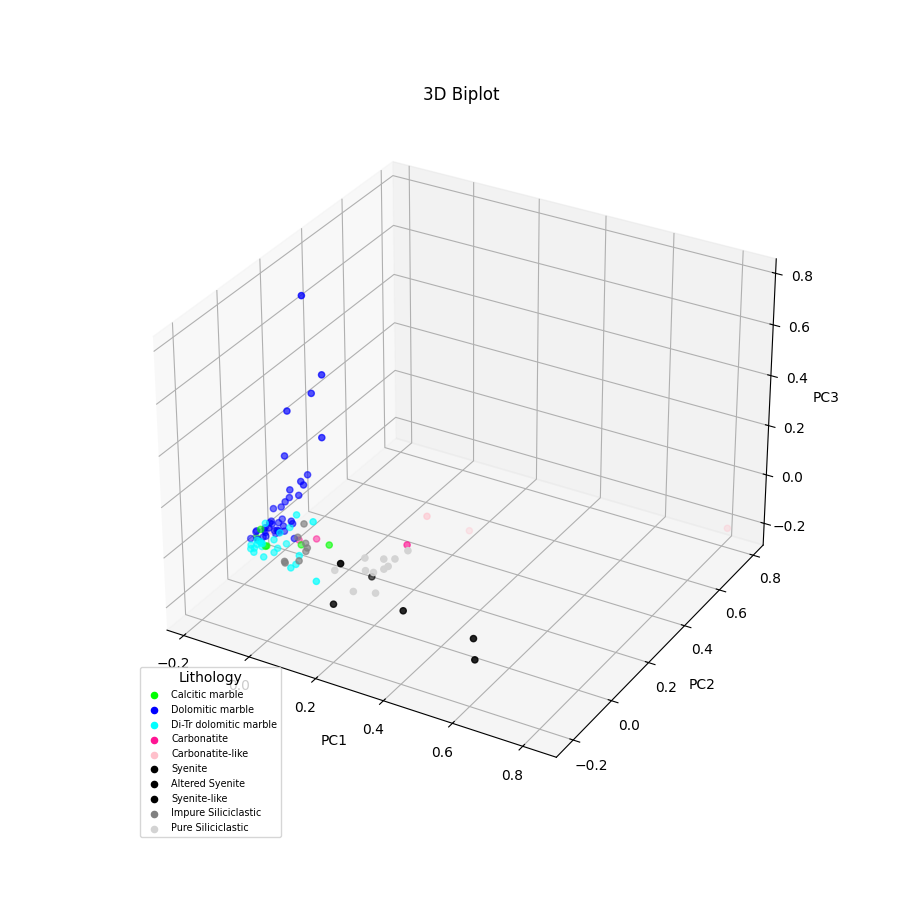

In [20]:

# Initialize the 3D graph
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
  
# Define scaled features as arrays
xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']



# Plot 3D scatterplot of PCA

#df = pd.read_excel(file_path, sheet_name=sheet_name)
#description = df.iloc[:, 0]

#descriptions = []
dc.reset_index(drop=True, inplace=True)
ds.reset_index(drop=True, inplace=True)

shapes1 = []
for i in range(len(filtered_df)):
    #print(f"Index {i}: Color {dc['Color'][i]}, Shape {ds['Shapes'][i]}")  # Debug print
    shape1 = ax.scatter3D(xdata[i], ydata[i], zdata[i], c=dc['Color'][i], marker=ds["Shapes"][i])
    shapes1.append(shape1)
    #text = ax.text(xdata[i], ydata[i], zdata[i], description[i], size=10, zorder=1, color='k')
    #descriptions.append(text)

#descriptions
dots = ax.scatter3D(xdata, ydata, zdata, c=dc['Color'])
dots.set_visible(True)

def shape(Show_Shape):
    if Show_Shape:
        for shape1 in shapes1:
            shape1.set_visible(True)  
        dots.set_visible(False) 
    else:
        dots.set_visible(True)
        for shape1 in shapes1:
            shape1.set_visible(False)

interact(shape, Show_Shape=False)



#legend
handle1 = []
label1 = []
for lithology, color in color_map.items():
    l1 = ax.scatter([], [], c=color, label=lithology)
    handle1.append(l1)
    label1.append(lithology)

handle2 = []
label2 = []
for shape, shapes in color_map1.items():
    l2 = ax.scatter([], [], c="black", marker=shapes, label=shape)
    handle2.append(l2)
    label2.append(shape)

legend1 = pyplot.legend(handle1, label1, bbox_to_anchor=(0.03, 0.2), title='Lithology', fontsize='x-small')
legend2 = pyplot.legend(handle2, label2, bbox_to_anchor=(0.03, 0.2), title='Shapes', fontsize='x-small')
ax.add_artist(legend1)
ax.add_artist(legend2)


def legenda(Legend):
    if Legend:
        legend1.set_visible(True)  
        legend2.set_visible(False)
    else:
        legend1.set_visible(False)
        legend2.set_visible(True)
interact(legenda, Legend=[('Shapes Legend', True),('Lithology Legend', False)])



# Arrows will be displayed for the following.
show_names=df.columns.tolist()
indx=df.columns.get_indexer(show_names)
scale=2

# Define the x, y, z variables
loadings = pca.components_
xs = scale*loadings[0]
ys = scale*loadings[1]
zs = scale*loadings[2]  
# Plot title of graph
plt.title(f'3D Biplot')
  
# Plot x, y, z labels
ax.set_xlabel('PC1')#, rotation=150)
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')#, rotation=60)
#plt.savefig('3D_biplot.svg')




arrow_list = []
    
# Plot the arrows
x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
# Plot specific arrow
#indx=df.columns.get_loc("Zn_ppm")

#show_arrows = ax.quiver(x_arr[indx], y_arr[indx], z_arr[indx], xs[indx], ys[indx], zs[indx],color='r')
for i, name in enumerate(df.columns):
    ip = df.columns.get_loc(name)
    arrow = ax.quiver(x_arr[ip], y_arr[ip], z_arr[ip], xs[ip], ys[ip], zs[ip], color='r', arrow_length_ratio = 0.1, linewidth=0.5)
    arrow_list.append(arrow)
    
def findarrow(change):
    if change: 
        for a in arrow_list:
            a.set_visible(True)
    else:
        for a in arrow_list:
            a.set_visible(False)
            
# Plot the loadings
namelist = []

for i , names in enumerate(show_names):
    ip=indx[i]
    #ax.scatter(xs[ip], ys[ip], zs[ip], s=100)
    n = ax.text(xs[ip]+0.02, ys[ip]+0.02, zs[ip]+0.02, names, fontsize='small')
    namelist.append(n)

show_name_checkbox = widgets.Checkbox(value=False, description='Show all Names')
all_arrow_checkbox = widgets.Checkbox(value=False, description='Show all Arrows')

def findname(show_name):
    if show_name:
        for n in namelist:
            n.set_visible(True)  
    else:
        for n in namelist:
            n.set_visible(False)

def findname_specific(change):
    selected_items = change['new']
    if 'all' in selected_items:
        select_multiple.value = options
        for n in namelist:
            n.set_visible(True)
        for arrow in arrow_list:
            arrow.set_visible(True)
    else:
        # Otherwise, update visibility based on selected items
        for i in range(len(options[1:])):  # Skip 'all' in options
            if options[i + 1] in selected_items:
                namelist[i].set_visible(True)
                arrow_list[i].set_visible(True)
            else:
                namelist[i].set_visible(False)
                arrow_list[i].set_visible(False)
        show_name_checkbox.value = False
        all_arrow_checkbox.value = False
    plt.draw()

interact(findname, show_name=show_name_checkbox)
interact(findarrow, change=all_arrow_checkbox)

options = ['all','Al2O3_pct','BaO_pct','CaO_pct','Fe2O3_pct','K2O_pct',
           'MgO_pct','MnO_pct','Na2O_pct','P2O5_pct','SiO2_pct',
           'SrO_ppm','TiO2_pct','LOI_pct','Ce_ppm','Cs_ppm','Dy_ppm',
           'Er_ppm','Eu_ppm','Ga_ppm','Gd_ppm','Hf_ppm','Ho_ppm',
           'La_ppm','Lu_ppm','Nb_ppm','Nd_ppm','Pr_ppm','Rb_ppm',
           'Sm_ppm','Sn_ppm','Ta_ppm','Tb_ppm','Th_ppm','Tm_ppm',
           'U_ppm','V_ppm','Y_ppm','Yb_ppm','Zr_ppm','As_ppm',
           'Bi_ppm','Hg_ppm','In_ppm','Re_ppm','Sb_ppm','Sc_ppm',
           'Se_ppm','Tl_ppm','Ag_ppm','Cd_ppm','Co_ppm','Cu_ppm',
           'Li_ppm','Mo_ppm','Ni_ppm','Pb_ppm','Zn_ppm','C_pct','S_pct',]

select_multiple = widgets.SelectMultiple(
    options=options,
    value=[],
    description='Select multiple items:'
)
select_multiple.observe(findname_specific, 'value')
print ('Press Command to Select Multiple')

display(select_multiple)


In [21]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
y = dc['Lithology']
y = y.values.ravel()
X = pca_df_scaled
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

print(clf.predict([[0.3, -0.01, 0.1]]))

Shape of y: (103,)
Shape of X: (103, 3)
['Pure Siliciclastic']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


interactive(children=(Dropdown(description='options', options=(('PC1 vs PC3', ['PC1', 'PC3', 0, 2]), ('PC2 vs …

<function __main__.planes(options)>

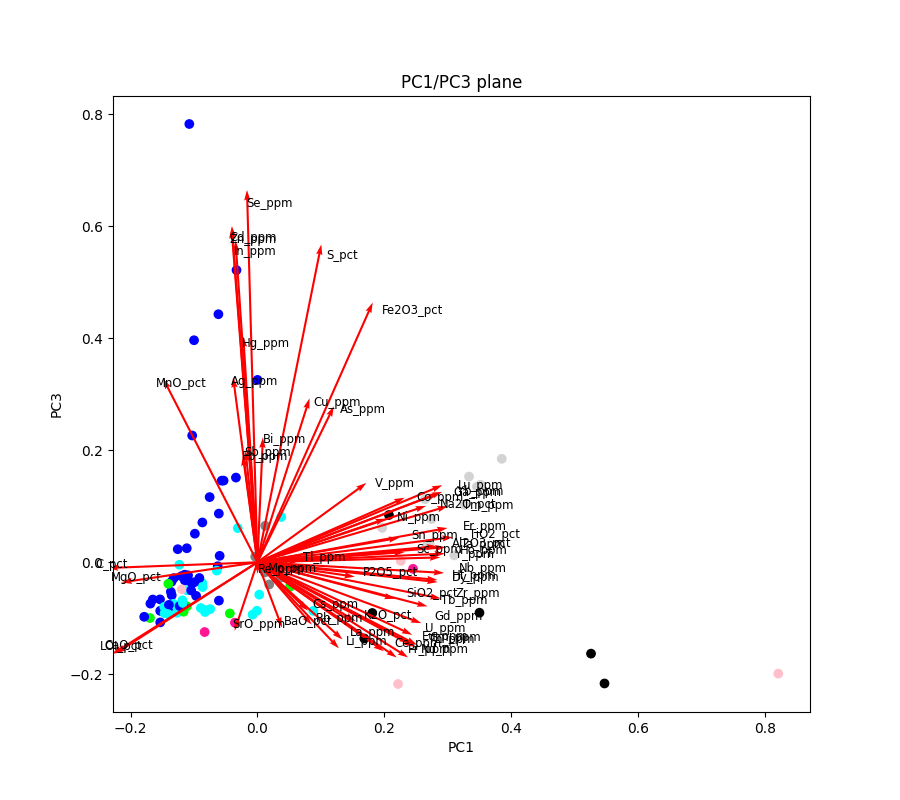

In [22]:
plt.figure(figsize=(9,8))

def planes (options):
    plt.clf()
    xdata = pca_df_scaled[options[0]]
    ydata = pca_df_scaled[options[1]]
    
    shapes2 = []
    for i in range(len(df)):
        shape2 = plt.scatter(xdata[i], ydata[i], c=dc['Color'][i], marker=ds["Shapes"][i])
        shapes2.append(shape2)
    
    dots2 = plt.scatter(xdata, ydata, c=dc['Color'])
    dots2.set_visible(True)
    
    def shape(Show_Shape):
        if Show_Shape:
            for shape2 in shapes2:
                shape2.set_visible(True)  
            dots2.set_visible(False) 
        else:
            dots2.set_visible(True)
            for shape2 in shapes2:
                shape2.set_visible(False)
    
    interact(shape, Show_Shape=False)
    
    
    show_names=df.columns.tolist()
    indx=df.columns.get_indexer(show_names)
    
    
    loadings = pca.components_
    xs = loadings[options[2]]
    ys = loadings[options[3]]
    
    
    #Plot the arrows
    arrow_list_2d = []
    
    x_arr = np.zeros(len(loadings[0]))
    y_arr = x_arr
    
    arrow_scale=0.7
    for i, name in enumerate(df.columns):
        ip = df.columns.get_loc(name)
        arrow_2d = plt.quiver(x_arr[ip], y_arr[ip], xs[ip], ys[ip], color='r', scale = arrow_scale, width = 0.003)
        arrow_list_2d.append(arrow_2d)
        
    namelist_2d = []
    for i , names in enumerate(show_names):
        ip=indx[i]
        #ax.scatter(xs[ip], ys[ip], zs[ip], s=100)
        n = plt.text((1.7)*xs[ip], (1.7)*ys[ip], names, fontsize='small')
        namelist_2d.append(n)

    def findname_2d(show_name):
        if show_name:
            for n in namelist_2d:
                n.set_visible(True)  
        else:
            for n in namelist_2d:
                n.set_visible(False)
        
    def findarrow_2d(Visibility_arrow):
        if Visibility_arrow: 
            for a in arrow_list_2d:
                a.set_visible(True)
        else:
            for a in arrow_list_2d:
                a.set_visible(False)
    interact(findarrow_2d, Visibility_arrow=True)
    interact(findname_2d, show_name=True)
    
    # namelist = []
    
    # for i , names in enumerate(show_names):
    #     ip=indx[i]
    #     #ax.scatter(xs[ip], ys[ip], zs[ip], s=100)
    #     n = plt.text((1/arrow_scale)*xs[ip], (1/arrow_scale)*ys[ip], names, fontsize='small')
    #     namelist.append(n)
    
    # def findname(show_name):
    #     if show_name:
    #         for n in namelist:
    #             n.set_visible(True)  
    #     else:
    #         for n in namelist:
    #             n.set_visible(False)
    
    # interact(findname, show_name=True)
    
    plt.xlabel(options[0])
    plt.ylabel(options[1])
    
    plt.title(f"{options[0]}/{options[1]} plane")


widgets.interact(planes, options = [('PC1 vs PC3', ['PC1', 'PC3', 0, 2]), ('PC2 vs PC3', ['PC2', 'PC3', 1, 2]), ('PC1 vs PC2', ['PC1', 'PC2', 0, 1])])

In [23]:
# # import relevant libraries for 3d graph
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(10,10))
 
# # choose projection 3d for creating a 3d graph
# axis = fig.add_subplot(111, projection='3d')
 
# # x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
# img=axis.scatter(x[:,0],x[:,1],x[:,2], c=df['Zn_ppm'])

# # Plot the loadings
# for i in range(5):
#     axis.scatter(xs[i], ys[i], zs[i], s=200)
#     #axis.text(
#     #    xs[i] + 0.1, 
#     #    ys[i] + 0.1, 
#     #    zs[i] + 0.1, 
#     #    varnames)
  
# # Plot the arrows
# x_arr = np.zeros(len(loadings[0]))
# y_arr = z_arr = x_arr
# axis.quiver(x_arr, y_arr, z_arr, xs, ys, zs)

# axis.set_xlabel("PC1")
# axis.set_ylabel("PC2")
# axis.set_zlabel("PC3")
# fig.colorbar(img)

In [27]:
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from ipywidgets import interact, IntSlider
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Remove all rows that have at least one NaN.
df = df.dropna()

def cluster_2d(axis1, axis2):
    global df
    if axis1 != axis2:
        # Remove "<" from the values.
        df[axis1] = df[axis1].apply(lambda x: x.replace('<', '') if isinstance(x, str) and '<' in x else x)
        df[axis2] = df[axis2].apply(lambda x: x.replace('<', '') if isinstance(x, str) and '<' in x else x)
        
        # Change to "object" to "float".
        df[axis1] = df[axis1].astype(float)
        df[axis2] = df[axis2].astype(float)
        
        
        # Set the data for clustering
        X = df[[axis1, axis2]].values
        
        #scaler = StandardScaler()
        #X_scaled = scaler.fit_transform(X)
        dd = pd.read_excel(file_path, sheet_name=sheet_name)
        
        #scaler and model
        def update_kmeans(k=3):
            global X     
            pipe = Pipeline([
            ("scale", StandardScaler()),
            ("model", KMeans(n_clusters=k, random_state = 0, n_init='auto'))])
        
            pipe.fit(X)
        
            # Add cluster labels to the DataFrame
            df['cluster'] = pipe.named_steps['model'].labels_
        
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                 np.arange(y_min, y_max, 0.01))
        
            Z = pipe.named_steps['model'].predict(pipe.named_steps['scale'].transform(np.c_[xx.ravel(), yy.ravel()]))
            Z = Z.reshape(xx.shape)
        
            plt.figure(figsize=(9, 7))
            plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.5)
            sns.scatterplot(data=df, x=axis1, y=axis2, hue='cluster', palette='viridis')
        
        
            df.apply(lambda row: plt.text(row[axis1], row[axis2], dd.iloc[row.name, 0], fontsize=7, ha='center'), axis=1)
        
            # Show the plot
            scaler = pipe.named_steps['scale']
            centroids = pipe.named_steps['model'].cluster_centers_
            centroids_original = scaler.inverse_transform(centroids)
        
            plt.scatter(centroids_original[:,0], centroids_original[:,1], 
                    marker="X", c="red", s=80, label="centroids")
            
            plt.legend()
            plt.title("K-Means Clustering")
            plt.show()
            
        interact(update_kmeans, k = IntSlider(min=2, max=10, step=1, description='N Clusters'))
    else:
        print ('select two different elements')

interact(cluster_2d, 
         axis1=widgets.Dropdown(options=df.columns.tolist(), value=df.columns[0], description='Axis1'), 
         axis2=widgets.Dropdown(options=df.columns.tolist(), value=df.columns[1], description='Axis2'))



interactive(children=(Dropdown(description='Axis1', options=('Al2O3_pct', 'BaO_pct', 'CaO_pct', 'Fe2O3_pct', '…

<function __main__.cluster_2d(axis1, axis2)>

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from ipywidgets import interact, IntSlider
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Remove all rows that have at least one NaN.
df = df.dropna()
dd = pd.read_excel(file_path, sheet_name=sheet_name)

def cluster_3d(axis1, axis2, axis3):
    global df
    if axis1 != axis2 != axis3:
        # Remove "<" from the values.
        for col in [axis1, axis2, axis3]:
            df[col] = df[col].apply(lambda x: x.replace('<', '') if isinstance(x, str) and '<' in x else x)
        
        # Change "object" to "float".
        df = df.astype({axis1: 'float', axis2: 'float', axis3: 'float'})
        
        # Set the data for clustering
        X = df[[axis1, axis2, axis3]].values
        
        #scaler = StandardScaler()
        #X_scaled = scaler.fit_transform(X)
        
        
        
        #scaler and model
        def update_kmeans(k=3):
            global df, X
            pipe = Pipeline([
                ("scale", StandardScaler()),
                ("model", KMeans(n_clusters=k, random_state=0, n_init='auto'))
            ])
            pipe.fit(X)
        
            df['cluster'] = pipe.named_steps['model'].labels_
        
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')
        
            scatter = ax.scatter(df[axis1], df[axis2], df[axis3], c=df['cluster'], cmap='viridis', s=10)
            df.apply(lambda row: ax.text(row[axis1], row[axis2], row[axis3], dd.iloc[row.name, 0], fontsize=7, ha='center'), axis=1)
        
            
        
            # Plot the centroids
            scaler = pipe.named_steps['scale']
            centroids = pipe.named_steps['model'].cluster_centers_
            centroids_original = scaler.inverse_transform(centroids)
            
            ax.scatter(centroids_original[:, 0], centroids_original[:, 1], centroids_original[:, 2], 
                       marker="X", c="red", s=100, label="centroids")
        
            ax.set_xlabel(axis1)
            ax.set_ylabel(axis2)
            ax.set_zlabel(axis3)
            plt.legend()
            plt.title("3D K-Means Clustering")
            plt.show()
        
        interact(update_kmeans, k=IntSlider(min=2, max=10, step=1, description='N Clusters'))
    else:
        print ('select three different elements')

interact(cluster_3d, 
         axis1=widgets.Dropdown(options=df.columns.tolist(), value=df.columns[0], description='Axis 1'), 
         axis2=widgets.Dropdown(options=df.columns.tolist(), value=df.columns[1], description='Axis 2'), 
         axis3=widgets.Dropdown(options=df.columns.tolist(), value=df.columns[2], description='Axis 3'))





interactive(children=(Dropdown(description='Axis 1', options=('Al2O3_pct', 'BaO_pct', 'CaO_pct', 'Fe2O3_pct', …

<function __main__.cluster_3d(axis1, axis2, axis3)>

In [26]:
            
            # x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            # z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
            # xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
            #                          np.linspace(y_min, y_max, 50),
            #                          np.linspace(z_min, z_max, 50))
        
            # # Predict cluster labels for each point in the mesh grid
            # grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
            # grid_points_scaled = pipe.named_steps['scale'].transform(grid_points)
            # Z = pipe.named_steps['model'].predict(grid_points_scaled)
            # Z = Z.reshape(xx.shape)
        
            # ax.scatter(xx, yy, zz, c=Z, cmap='Pastel1', alpha=0.1)
        
df.iloc[:,0]

0       0.73
1       0.68
2       0.56
3       0.92
4       3.18
       ...  
98     13.10
99     13.35
100     0.21
101     0.08
102     0.36
Name: Al2O3_pct, Length: 103, dtype: float64

In [ ]:
# Plot the distortion score elbow.
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(10, 6))
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1, 12)).fit(X)
visualizer.show()